In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic') 

In [38]:
train=pd.read_csv(r"C:/Users/user/OneDrive/바탕 화면/데브코스/open/train.csv")
test=pd.read_csv(r"C:/Users/user/OneDrive/바탕 화면/데브코스/open/test.csv")

In [3]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [5]:
train.isna().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [6]:
column_names = train.columns.tolist()
for i in column_names:
    print(i)
    print(train[i].unique())
    print("\n")

ID
['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_96291' 'TRAIN_96292'
 'TRAIN_96293']


대출금액
[12480000 14400000 12000000 ...  1650000 36240000 39450000]


대출기간
[' 36 months' ' 60 months']


근로기간
['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']


주택소유상태
['RENT' 'MORTGAGE' 'OWN' 'ANY']


연간소득
[ 72000000 130800000  96000000 ...  78602400  83094000  66330000]


부채_대비_소득_비율
[18.9  22.33  8.6  ... 63.64 71.4  52.8 ]


총계좌수
[ 15  21  14  19  30  22  45  11  26  10  24  17  35  20   9  36  16  59
  29  12  28  31   8  37   6   7  13  25  46  18  42  32  63  38  43  23
  39  33  27  76   5  40  41  50  55  61  51  53  52  62  81  34  47  48
  44   4  64  56  54  67  49  72  69  57  66  73  65 101  58  85  86  97
  60  71  70  78  75  68  79  77  95  84  74  80  90  93  96  89  91  94
  82  87 109 130 102 105  92  99 127 106  98  83 169 140 151  88 125 112
 110]


대출목적
['부채 통합'

In [7]:
train["근로기간"]

0          6 years
1        10+ years
2          5 years
3          8 years
4          Unknown
           ...    
96289    10+ years
96290    10+ years
96291       1 year
96292      5 years
96293    10+ years
Name: 근로기간, Length: 96294, dtype: object

In [8]:
print(sorted(train["근로기간"].unique()))

['1 year', '1 years', '10+ years', '10+years', '2 years', '3', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', '<1 year', 'Unknown']


In [9]:
train['근로기간'] = train['근로기간'].map(lambda x:x.replace(' ', ''))

In [10]:
print(sorted(train["근로기간"].unique()))

['10+years', '1year', '1years', '2years', '3', '3years', '4years', '5years', '6years', '7years', '8years', '9years', '<1year', 'Unknown']


-----------------------------------------------------------------------------------------

In [11]:
train.loc[train['근로기간']=='1year',"근로기간"]="1years"

In [12]:
print(sorted(train["근로기간"].unique()))

['10+years', '1years', '2years', '3', '3years', '4years', '5years', '6years', '7years', '8years', '9years', '<1year', 'Unknown']


In [13]:
train['근로기간'] = train['근로기간'].map(lambda x:x.replace('years', ''))

In [14]:
print(sorted(train["근로기간"].unique()))

['1', '10+', '2', '3', '4', '5', '6', '7', '8', '9', '<1year', 'Unknown']


In [15]:
train.loc[train["근로기간"]=="10+", "근로기간"]="10"
train.loc[train["근로기간"]=='<1year',"근로기간"]="0"
train.loc[train["근로기간"]=='Unknown',"근로기간"]="0"

In [16]:
print(sorted(train["근로기간"].unique()))

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


In [17]:
train["근로기간"]=train["근로기간"].astype("int")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  int32  
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 10.7+ MB


In [19]:
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

In [20]:
order=["A","B","C","D","E","F","G"]

In [21]:
train["대출기간"]

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
96289     36 months
96290     60 months
96291     36 months
96292     36 months
96293     36 months
Name: 대출기간, Length: 96294, dtype: object

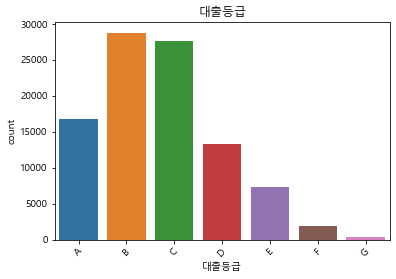

In [22]:
plt.rc('font', family='Malgun Gothic')
sns.countplot(data=train,x="대출등급", order=order)
plt.xticks(rotation=45)
plt.title("대출등급")
plt.show()

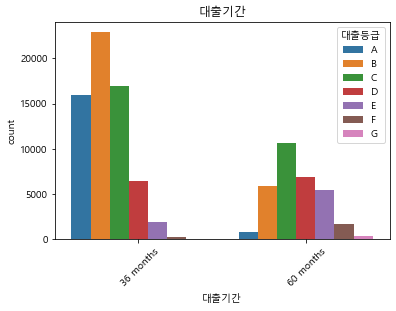

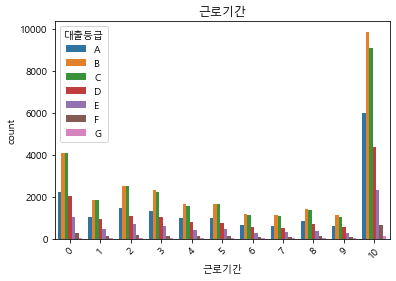

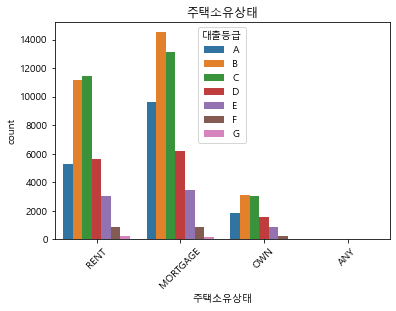

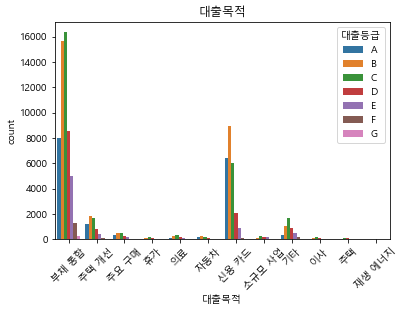

In [23]:
for col in list_cat:
    plt.rc('font', family='Malgun Gothic')
    sns.countplot(data=train,x=col, hue="대출등급", hue_order=order)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    #모기지- 주택담보대출

In [24]:
(train['주택소유상태'] == "ANY").sum()

1

In [25]:
selected_rows=train[train['주택소유상태'] == 'ANY']

In [26]:
train.loc[selected_rows.index, '주택소유상태'] = "MORTGAGE"

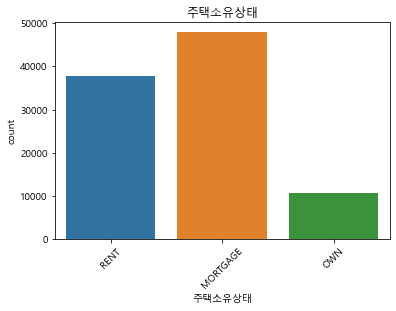

In [27]:
plt.rc('font', family='Malgun Gothic')
sns.countplot(data=train,x="주택소유상태")
plt.xticks(rotation=45)
plt.title("주택소유상태")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop(['대출등급','ID'], axis = 1)
y = train['대출등급']


In [29]:
from sklearn.preprocessing import LabelEncoder
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 각 변수에 대해 라벨 인코딩 수행
for col in list_cat:
    X[col] = label_encoder.fit_transform(X[col])

# 인코딩된 데이터 확인
print(X)

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=123)
print(X_train.shape)
print(y_train.shape)

           대출금액  대출기간  근로기간  주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  대출목적  \
0      12480000     0     6       2   72000000        18.90    15     1   
1      14400000     1    10       0  130800000        22.33    21    10   
2      12000000     0     5       0   96000000         8.60    14     1   
3      14400000     0     8       0  132000000        15.09    15     1   
4      18000000     1     0       2   71736000        25.39    19     8   
...         ...   ...   ...     ...        ...          ...   ...   ...   
96289  14400000     0    10       0  210000000         9.33    33     3   
96290  28800000     1    10       0  132000000         5.16    25    10   
96291  14400000     0     1       0   84000000        11.24    22     3   
96292  15600000     0     5       0   66330000        17.30    21     1   
96293   8640000     0    10       2   50400000        11.80    14     3   

       최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수  
0                 0        0       0.0    0.

In [30]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_clf = DecisionTreeClassifier(random_state = 123)
dt_clf = dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred, average='weighted')
print('Accuracy :', round(accuracy_dt,4))
print('Precision :', round(f1_dt,4))

Accuracy : 0.8283
Precision : 0.8282


In [31]:
# 의사결정나무 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params= {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} # 원하는 파라미터가 있다면 추가 가능

grid_cv = GridSearchCV(estimator=dt_clf, param_grid = params, cv=5, scoring='accuracy')
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
GridSarchCV highest Accuracy: 0.8390736958704005


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 123)
rf_clf = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred, average='weighted')
print('Accuracy :', round(accuracy_rf,4))
print('Precision :', round(f1_rf,4))

Accuracy : 0.7931
Precision : 0.7886


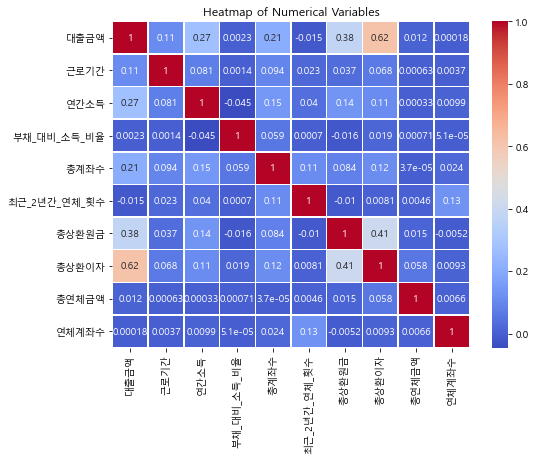

In [33]:
# 수치형 변수들만을 추출하여 새로운 데이터프레임 생성
numeric_df = train.select_dtypes(include=['int', 'float'])

# 상관관계 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Numerical Variables')
plt.show()

In [34]:
# 근로기간이 0인 경우에는 대출금액 대비 근로기간을 0으로 설정하는 함수 정의
def calculate_ratio(row):
    if row["근로기간"] == 0:
        return 0
    else:
        return row["대출금액"] / row["근로기간"]

# "근로기간 대비 대출금액" 열 추가
train["근로기간 대비 대출금액"] = train.apply(calculate_ratio, axis=1)

print(train)

                ID      대출금액        대출기간  근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months     6      RENT   72000000   
1      TRAIN_00001  14400000   60 months    10  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months     5  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months     8  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months     0      RENT   71736000   
...            ...       ...         ...   ...       ...        ...   
96289  TRAIN_96289  14400000   36 months    10  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months    10  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months     5  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months    10      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0            18.90    15  부채 통합             0        0       0.0    0.0 

In [39]:
y1 = train['대출등급']
train = train.drop(['대출등급','ID'], axis = 1)

In [40]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 각 변수에 대해 라벨 인코딩 수행
for col in list_cat:
    train[col] = label_encoder.fit_transform(train[col])

# 인코딩된 데이터 확인
print(X)

X_train1, X_test1, y_train1, y_test1=train_test_split(X, y1,test_size=0.3, random_state=123)
print(X_train1.shape)
print(y_train1.shape)

           대출금액  대출기간  근로기간  주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  대출목적  \
0      12480000     0     6       2   72000000        18.90    15     1   
1      14400000     1    10       0  130800000        22.33    21    10   
2      12000000     0     5       0   96000000         8.60    14     1   
3      14400000     0     8       0  132000000        15.09    15     1   
4      18000000     1     0       2   71736000        25.39    19     8   
...         ...   ...   ...     ...        ...          ...   ...   ...   
96289  14400000     0    10       0  210000000         9.33    33     3   
96290  28800000     1    10       0  132000000         5.16    25    10   
96291  14400000     0     1       0   84000000        11.24    22     3   
96292  15600000     0     5       0   66330000        17.30    21     1   
96293   8640000     0    10       2   50400000        11.80    14     3   

       최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수  
0                 0        0       0.0    0.

In [41]:
rf_clf1 = RandomForestClassifier(random_state = 123)
rf_clf1 = rf_clf1.fit(X_train1, y_train1)
rf_pred1 = rf_clf1.predict(X_test1)

accuracy_rf1 = accuracy_score(y_test1, rf_pred1)
f1_rf1 = f1_score(y_test1, rf_pred1, average='weighted')
print('Accuracy :', round(accuracy_rf1,4))
print('Precision :', round(f1_rf1,4))

Accuracy : 0.7931
Precision : 0.7886


In [42]:
import numpy as np

In [56]:
# 로그 변환 함수 정의
def log_transform(x):
    return np.log(x + 1)  # 로그 변환 시 0이 되는 경우를 방지하기 위해 1을 더해줍니다.
# 대출금액에 로그 변환 적용
train['대출금액_로그변환'] = train['대출금액'].apply(log_transform)
train['연간소득_로그변환'] = train['연간소득'].apply(log_transform)
test['대출금액_로그변환'] = test['대출금액'].apply(log_transform)
test['연간소득_로그변환'] = test['연간소득'].apply(log_transform)


X['대출금액_로그변환'] = X['대출금액'].apply(log_transform)
X['연간소득_로그변환'] = X['연간소득'].apply(log_transform)
test['대출금액_로그변환'] = test['대출금액'].apply(log_transform)
test['연간소득_로그변환'] = test['연간소득'].apply(log_transform)

In [45]:
columns_list = train.columns.tolist()

print(columns_list)

['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출금액_로그변환', '연간소득_로그변환']


In [49]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 각 변수에 대해 라벨 인코딩 수행
for col in list_cat:
    X[col] = label_encoder.fit_transform(X[col])

# 인코딩된 데이터 확인
print(X)

X_train1, X_test1, y_train1, y_test1=train_test_split(X, y1,test_size=0.3, random_state=123)
print(X_train1.shape)
print(y_train1.shape)

           대출금액  대출기간  근로기간  주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  대출목적  \
0      12480000     0     6       2   72000000        18.90    15     1   
1      14400000     1    10       0  130800000        22.33    21    10   
2      12000000     0     5       0   96000000         8.60    14     1   
3      14400000     0     8       0  132000000        15.09    15     1   
4      18000000     1     0       2   71736000        25.39    19     8   
...         ...   ...   ...     ...        ...          ...   ...   ...   
96289  14400000     0    10       0  210000000         9.33    33     3   
96290  28800000     1    10       0  132000000         5.16    25    10   
96291  14400000     0     1       0   84000000        11.24    22     3   
96292  15600000     0     5       0   66330000        17.30    21     1   
96293   8640000     0    10       2   50400000        11.80    14     3   

       최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수  
0                 0        0       0.0    0.

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,0,6,2,72000000,18.90,15,1,0,0,0.0,0.0,0.0
1,14400000,1,10,0,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0
2,12000000,0,5,0,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0
3,14400000,0,8,0,132000000,15.09,15,1,0,325824,153108.0,0.0,0.0
4,18000000,1,0,2,71736000,25.39,19,8,0,228540,148956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,10,0,210000000,9.33,33,3,0,974580,492168.0,0.0,0.0
96290,28800000,1,10,0,132000000,5.16,25,10,0,583728,855084.0,0.0,0.0
96291,14400000,0,1,0,84000000,11.24,22,3,0,1489128,241236.0,0.0,0.0
96292,15600000,0,5,0,66330000,17.30,21,1,2,1378368,818076.0,0.0,0.0


In [58]:
# 선택할 특성 변수들 정의
train
selected_features = ['대출기간', '근로기간', '주택소유상태', '부채_대비_소득_비율', 
                     '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', 
                     '총연체금액', '연체계좌수', '대출금액_로그변환','연간소득_로그변환']

# 선택된 변수들로 이루어진 데이터프레임 생성
selected_df = X[selected_features]

# 랜덤 포레스트 모델 훈련
X = selected_df
y1  # 예시로 타겟변수를 추가해줍니다.
X_train2, X_test2, y_train2, y_test2=train_test_split(X, y1,test_size=0.3, random_state=123)
model = RandomForestClassifier()

In [59]:
rf_clf2 = model.fit(X_train2, y_train2)
rf_pred2 = rf_clf2.predict(X_test2)

accuracy_rf2 = accuracy_score(y_test2, rf_pred2)
f1_rf2 = f1_score(y_test2, rf_pred2, average='weighted')
print('Accuracy :', round(accuracy_rf2,4))
print('Precision :', round(f1_rf2,4))

Accuracy : 0.791
Precision : 0.7866


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier(random_state = 123)
g_boost.fit(X_train, y_train)
g_boost_pred = g_boost.predict(X_test)

accuracy_g_boost = accuracy_score(y_test, g_boost_pred)
f1_g_boost = f1_score(y_test, g_boost_pred, average='weighted')
print('Accuracy :', round(accuracy_g_boost,4))
print('Precision :', round(f1_g_boost,4))

Accuracy : 0.7452
Precision : 0.7407


파생변수만들기

In [61]:
# 총상환원금비율과 총상환이자비율 추가
train['총상환원금비율'] = train['총상환원금'] / train['대출금액']
train['총상환이자비율'] = train['총상환이자'] / train['대출금액']

In [62]:
test['총상환원금비율'] = test['총상환원금'] / test['대출금액']
test['총상환이자비율'] = test['총상환이자'] / test['대출금액']

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  int32  
 2   근로기간          96294 non-null  int32  
 3   주택소유상태        96294 non-null  int32  
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  int32  
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출금액_로그변환     96294 non-null  float64
 14  연간소득_로그변환     96294 non-null  float64
 15  총상환원금비율       96294 non-null  float64
 16  총상환이자비율       96294 non-null  float64
dtypes: float64(8), int32(4), int64(5)
memory usage: 11.0 MB


In [66]:
# 선택할 특성 변수들 정의
selected_features = ['대출기간', '근로기간', '주택소유상태', '부채_대비_소득_비율', 
                     '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', 
                     '총연체금액', '연체계좌수', '대출금액_로그변환','연간소득_로그변환','총상환원금비율','총상환이자비율']

# 선택된 변수들로 이루어진 데이터프레임 생성
selected_df = train[selected_features]

# 랜덤 포레스트 모델 훈련
X = selected_df
y1  # 예시로 타겟변수를 추가해줍니다.
X_train2, X_test2, y_train2, y_test2=train_test_split(X, y1,test_size=0.3, random_state=123)
model = RandomForestClassifier()
rf_clf2 = model.fit(X_train2, y_train2)
rf_pred2 = rf_clf2.predict(X_test2)

accuracy_rf2 = accuracy_score(y_test2, rf_pred2)
f1_rf2 = f1_score(y_test2, rf_pred2, average='weighted')
print('Accuracy :', round(accuracy_rf2,4))
print('Precision :', round(f1_rf2,4))

Accuracy : 0.9425
Precision : 0.9422


In [67]:
X 
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=123)

In [68]:
g_boost = GradientBoostingClassifier(random_state = 123)
g_boost.fit(X, y)
g_boost_pred = g_boost.predict(X_test)

accuracy_g_boost = accuracy_score(y_test, g_boost_pred)
f1_g_boost = f1_score(y_test, g_boost_pred, average='macro')
print('Accuracy :', round(accuracy_g_boost,4))
print('f1_score :', round(f1_g_boost,4))

Accuracy : 0.9528
f1_score : 0.9472
